<a href="https://colab.research.google.com/github/lupitaesp/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# EXTRACCIÓN DE CONOCIMIENTO EN BASES DE DATOS.

**Nombre del alumno**
Guadalupe Espinoza Riveros

**Matrícula**
1718110388


#  Importamos las librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

pd.options.display.max_columns = 4

# Importamos el Dataset

In [ ]:
df =  pd.read_csv("titanic.csv")

# Análisis del Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [ ]:
df.head()

,Survived,Pclass,...,Parents/Children,Fare
0,0,3,...,0,7.2500
1,1,1,...,0,71.2833
2,1,3,...,0,7.9250
3,1,1,...,0,53.1000
4,0,3,...,0,8.0500


In [ ]:
df.describe()

,Survived,Pclass,...,Parents/Children,Fare
count,887.000000,887.000000,...,887.000000,887.00000
mean,0.385569,2.305524,...,0.383315,32.30542
std,0.487004,0.836662,...,0.807466,49.78204
min,0.000000,1.000000,...,0.000000,0.00000
25%,0.000000,2.000000,...,0.000000,7.92500
50%,0.000000,3.000000,...,0.000000,14.45420
75%,1.000000,3.000000,...,0.000000,31.13750
max,1.000000,3.000000,...,6.000000,512.32920


# Creación de la columna (Feature Ingenering)

In [ ]:
df['Male'] = df['Sex'] == 'male'

In [ ]:
df.head()

,Survived,Pclass,...,Fare,Male
0,0,3,...,7.2500,True
1,1,1,...,71.2833,False
2,1,3,...,7.9250,False
3,1,1,...,53.1000,False
4,0,3,...,8.0500,True


In [ ]:
df.describe()

,Survived,Pclass,...,Parents/Children,Fare
count,887.000000,887.000000,...,887.000000,887.00000
mean,0.385569,2.305524,...,0.383315,32.30542
std,0.487004,0.836662,...,0.807466,49.78204
min,0.000000,1.000000,...,0.000000,0.00000
25%,0.000000,2.000000,...,0.000000,7.92500
50%,0.000000,3.000000,...,0.000000,14.45420
75%,1.000000,3.000000,...,0.000000,31.13750
max,1.000000,3.000000,...,6.000000,512.32920


In [ ]:
df['Male'].sum()

573

# Scatter Plot

Text(0, 0.5, 'Age')

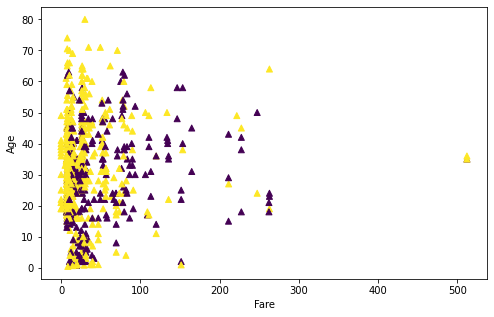

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Male'], marker='^')
plt.xlabel('Fare')
plt.ylabel('Age')

Text(0, 0.5, 'Age')

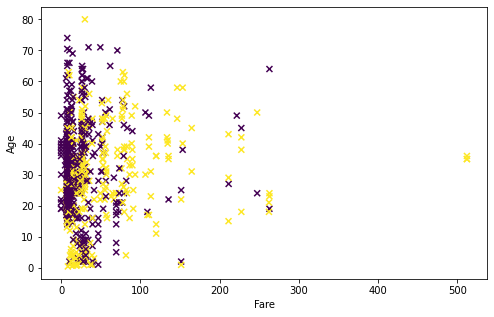

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'], df['Age'], c=df['Survived'], marker='x')
plt.xlabel('Fare')
plt.ylabel('Age')

# Separar características y objetivo

In [ ]:
X = df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y = df['Survived'].values
X

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

In [ ]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

# Configurar el modelo

In [ ]:
model = LogisticRegression()

# Dividir en Train y Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

In [ ]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1])

# Entrenar

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

# Predicciones

In [ ]:
y_pred = model.predict(X_test)

# Analizar las predicciones

In [ ]:
X_test.shape

(178, 6)

In [ ]:
X_test[6]

array([3, 25.0, 1, 0, 7.925, False], dtype=object)

In [ ]:
y_test[6]

0

In [ ]:
y_pred[6]

1

# Probabilidad

In [ ]:
model.predict_proba(X_test)[6,0]

0.43512149983433746

In [ ]:
model.predict_proba(X_test)[6,1]

0.5648785001656625

In [ ]:
y.shape

(887,)

In [ ]:
y.sum() #  Sobrevivieron

342

In [ ]:
y.shape - y.sum() #  No Sobrevivieron

array([545])

>#### 99.9% Registros son correos válidos.

>#### 0.1% Registros son de correos spam.

>#### Accuracy del 99%

# Métricas

> #### Accuracy = Número de predicción correctas / Total de predicciones

In [ ]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [ ]:
(y_pred == y_test).sum()

141

In [ ]:
y_test.shape

(178,)

In [ ]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

# Matriz de confisión

In [ ]:
confusion_matrix(y_test,y_pred)

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


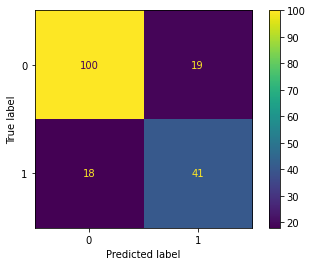

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


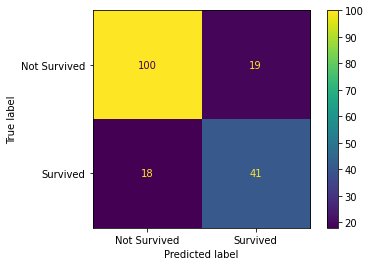

In [ ]:
labels = ["Not Survived", "Survived"]
plot_confusion_matrix(model,X_test,y_test,display_labels=labels)

In [ ]:
labels = ["No Survived", "Survived"]
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

 No Survived       0.85      0.84      0.84       119
    Survived       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



# Accuracy of Confusion Matrix

> #### Accuracy = Suma de predicciones correctas / Total de predicciones

In [ ]:
accuracy = (95 + 50) / (95 + 50 + 15 + 18)
print(accuracy)

0.8146067415730337


# Precisión 

¿Qué proporción de identificaciones positivas fue realmente correcta?

Precisión = Positivos predichos correctamente / Predicciones positivas

In [ ]:
precision = 50 / (50 + 15)
print(precision)

0.7692307692307693


# Recall 

¿Qué proporción de positivos reales se identificaron correctamente?

recall = True positive / (True positive + False negative)

In [ ]:
recall = 50 / (50 + 18)
print(recall)

0.7352941176470589


# F1 Score

Es el promedio de presicion y recall

f1_score = 2 * ((Precision * Recall) / (Precision + Recall))

In [ ]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.7518796992481205

# SKLearn Metrics

In [ ]:
print("Accuracy: {} : {}".format(accuracy,accuracy_score(y_test, y_pred)))

Accuracy: 0.8146067415730337 : 0.7921348314606742


In [ ]:
print("Precision: {} : {}".format(precision,precision_score(y_test, y_pred)))

Precision: 0.7692307692307693 : 0.6833333333333333


In [ ]:
print("Recall: {} : {}".format(recall,recall_score(y_test, y_pred)))

Recall: 0.7352941176470589 : 0.6949152542372882


In [ ]:
print("F1 Score: {} : {}".format(f1,f1_score(y_test,y_pred)))

F1 Score: 0.7518796992481205 : 0.6890756302521008


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       119
           1       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



# Cambiar el umbral (Threshold)

In [ ]:
model.predict_proba(X_test)[:,1]

array([0.06764448, 0.13775556, 0.41139818, 0.96163257, 0.30867781,
       0.45400999, 0.5648785 , 0.63629796, 0.1229917 , 0.20776867,
       0.91368246, 0.91591633, 0.18322147, 0.15378195, 0.57339997,
       0.3658364 , 0.06542257, 0.45096346, 0.07287269, 0.31893616,
       0.10172904, 0.3136617 , 0.9802048 , 0.85278234, 0.19227175,
       0.67339565, 0.14349118, 0.08790537, 0.09014929, 0.11838365,
       0.51613126, 0.8883227 , 0.2915428 , 0.68256625, 0.05987641,
       0.22767983, 0.07729632, 0.10541894, 0.84135978, 0.04905227,
       0.70129991, 0.1281296 , 0.02972205, 0.10428988, 0.45599745,
       0.42921745, 0.62015087, 0.35097717, 0.90544746, 0.77578254,
       0.12673462, 0.96493436, 0.85268989, 0.12070312, 0.95463995,
       0.43516132, 0.92260589, 0.90316159, 0.11532671, 0.12282071,
       0.16608781, 0.09753136, 0.09015433, 0.19580929, 0.80966077,
       0.0458477 , 0.06030838, 0.29308123, 0.02213963, 0.93047285,
       0.6063037 , 0.40105289, 0.10541894, 0.03625061, 0.10129

In [ ]:
model.predict_proba(X_test)[:,1] > 0.75

array([False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
model.predict_proba(X_test)[:,1] >= 0.5

array([False, False, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False,  True,